In week 3's assignment Gaussian generative models for handwritten digit recognition'', you saw how to load the MNIST data set of handwritten digits and build a basic classifier for it. It is now time to try using an SVM for this problem.

Create a new Jupyter notebook to do the following.

Load in the MNIST data (the training set of `60,000` points and the test set of `10,000` points).
Learn a linear SVM classifier using `sklearn.svm.LinearSVC`, setting `loss='hinge'`. Try different values `C = 0.01, 0.1, 1.0, 10.0, 100.0`. Find the training error and test error in each case.
Then try kernel SVM with a quadratic kernel. For this you can use `sklearn.svm.SVC`, setting `kernel='poly'` and `degree = 2`. Just try the setting `C = 1.0`.

### 1. Set up notebook and load in data

As usual, we start by importing the required packages and data. For this notebook we will be using the *entire* `MNIST` dataset. The code below defines some helper functions that will load `MNIST` onto your computer.

In [1]:
%matplotlib inline
import sys
import matplotlib.pyplot as plt 
import gzip, os
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.model_selection import train_test_split

if sys.version_info[0] == 2:
    from urllib import urlretrieve
else:
    from urllib.request import urlretrieve

In [2]:
# Function that downloads a specified MNIST data file from Yann Le Cun's website
def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
    print("Downloading %s" % filename)
    urlretrieve(source + filename, filename)

# Invokes download() if necessary, then reads in images
def load_mnist_images(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1,784)
    return data

def load_mnist_labels(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

Now load the training set and test set

In [3]:
## Load the training set
train_data = load_mnist_images('train-images-idx3-ubyte.gz')
train_labels = load_mnist_labels('train-labels-idx1-ubyte.gz')

## Load the testing set
test_data = load_mnist_images('t10k-images-idx3-ubyte.gz')
test_labels = load_mnist_labels('t10k-labels-idx1-ubyte.gz')

The function **displaychar** shows a single MNIST digit. To do this, it first has to reshape the 784-dimensional vector into a 28x28 image.

In [4]:
def displaychar(image):
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()

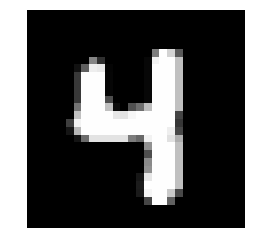

In [5]:
displaychar(train_data[58])

The training set consists of 60,000 images. Thus `train_data` should be a 60000x784 array while `train_labels` should be 60000x1. Let's check.

In [6]:
train_data.shape, train_labels.shape

((60000, 784), (60000,))

### 2. Fit a linear SVM classifier to the training data

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error

In [10]:
# Set the parameters by cross-validation
tuned_parameters = [{'C': [0.01, 0.1, 1.0, 10.0, 100.0]}]

scores = ['r2']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(LinearSVC(max_iter=10000), tuned_parameters, cv=5, scoring=score)
#     clf.fit(N_set_X_lasso, N_set_y)
    clf.fit(train_data, train_labels)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

# Tuning hyper-parameters for r2

Best parameters set found on development set:

{'C': 0.01}

Grid scores on development set:

0.741 (+/-0.068) for {'C': 0.01}
0.707 (+/-0.073) for {'C': 0.1}
0.719 (+/-0.064) for {'C': 1.0}
0.726 (+/-0.051) for {'C': 10.0}
0.671 (+/-0.060) for {'C': 100.0}



In [12]:
lin_svc = LinearSVC(max_iter=10000, C=0.01)
lin_svc.fit(train_data, train_labels)

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=10000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [13]:
pred_train_y = lin_svc.predict(train_data)

In [15]:
pred_train_y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [16]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [17]:
sum(pred_train_y != train_labels)/len(train_labels)

0.1013

In [18]:
quadratic_svc = SVC(max_iter=10000, C=1, kernel='poly', degree=2)
quadratic_svc.fit(train_data, train_labels)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
pred_train_y2 = quadratic_svc.predict(train_data)

In [21]:
sum(pred_train_y2 != train_labels)/len(train_labels)

0.0

In [22]:
pred_test_y2 = quadratic_svc.predict(test_data)

In [23]:
sum(pred_test_y2 != test_labels)/len(test_labels)

0.0194